# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import json
import requests
from scipy.stats import linregress

api_key = "ce066c6f7c30563a3c8383a19e19fdc5"
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [3]:
city_list = []

cities_df = pd.read_csv("../output_data/cities.csv")
city_list = cities_df['City'].tolist()


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name = []
city_Lat = []
city_Lng = []
city_Max = []
city_Hum = []
city_Cloud = []
city_Country = []
city_Wind = []
city_Date = []

for city in city_list:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    city_name.append(weather_json['name'])
    city_Lat.append(weather_json['coord']['lat'])
    city_Lng.append(weather_json['coord']['lon'])
    city_Max.append(weather_json['main']['temp_max'])
    city_Hum.append(weather_json['main']['humidity'])
    city_Cloud.append(weather_json['clouds']['all'])
    city_Country.append(weather_json['sys']['country'])
    city_Wind.append(weather_json['wind']['speed'])
    city_Date.append(weather_json['dt'])
    print(weather_json["id"])
    print(weather_json["name"])
    
    



556268
Ostrovnoy
934322
Mahébourg
3831208
Qaanaaq
1790437
Zhuhai
3369157
Cape Town
4020109
Atuona
6255012
Flinders
3354077
Opuwo
2015306
Tiksi
503965
Pushkinskiye Gory
2027296
Aykhal
3466704
Castro
4035715
Avarua
2017155
Saskylakh
3893726
Constitución
5106841
Albany
2013392
Vilyuysk
3833367
Ushuaia
1106677
Bambous Virieux
1503037
Kodinsk
1185095
Teknāf
2075265
Busselton
1651531
Ambon City
3395458
Maragogi
5503914
Fallon
1153072
Kantang
1273850
Colonelganj
3874787
Punta Arenas
4030556
Rikitea
2155415
New Norfolk
3357247
Gobabis
1797929
Qingdao
6111862
Port Hardy
2127060
Arman'
2020311
Mamakan
5282297
Bethel
4989133
Charter Township of Clinton
3132644
Varhaug
2027316
Ayan
3867427
Mayor Pablo Lagerenza
3366880
Hermanus
6167817
Torbay
6185377
Yellowknife
986717
Kruisfontein
3652764
Puerto Ayora
3618337
Rosita
1067565
Beloha
964420
Port Elizabeth
964432
Port Alfred
1713191
Garchitorena
5866583
Saint Paul Harbor
3430863
Mar del Plata
1159384
Tāybād
3985710
Cabo San Lucas
4033356
Tiarei
20225

In [5]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 27.7172, 'lon': 109.1853},
 'dt': 1655781883,
 'id': 1792592,
 'main': {'feels_like': 88.54,
          'grnd_level': 972,
          'humidity': 86,
          'pressure': 1001,
          'sea_level': 1001,
          'temp': 81.34,
          'temp_max': 81.34,
          'temp_min': 81.34},
 'name': 'Tongren',
 'sys': {'country': 'CN', 'sunrise': 1655761683, 'sunset': 1655811708},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 118, 'gust': 3.42, 'speed': 2.48}}


In [6]:
weather_dict = {
    "City": city_name,
    "Lat": city_Lat,
    "Lng": city_Lng,
    "Max Temp": city_Max,
    "Humidity": city_Hum,
    "Cloudiness": city_Cloud,
    "Wind Speed": city_Wind,
    "Country": city_Country,
    "Date": city_Date,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,39.40,93,100,10.02,RU,1655781480
1,Mahébourg,-20.4081,57.7000,68.29,56,20,5.75,MU,1655781480
2,Qaanaaq,77.4840,-69.3632,36.54,85,96,3.65,GL,1655781481
3,Zhuhai,22.2769,113.5678,87.85,89,40,10.36,CN,1655781482
4,Cape Town,-33.9258,18.4232,59.38,81,0,11.01,ZA,1655781401


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [8]:
weather_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.502709,22.445368,67.556460,71.828467,54.994526,7.737737,1.655782e+09
std,33.404166,91.906309,13.981094,19.566503,40.164538,5.268075,1.356459e+02
min,-54.800000,-175.200000,28.450000,1.000000,0.000000,0.000000,1.655781e+09
25%,-6.473700,-62.060550,57.585000,63.000000,12.750000,3.650000,1.655782e+09
50%,20.880800,25.676700,69.725000,75.000000,61.000000,6.850000,1.655782e+09
75%,47.892200,108.176850,78.212500,86.000000,98.250000,11.037500,1.655782e+09
max,78.218600,179.316700,94.980000,100.000000,100.000000,32.210000,1.655782e+09


# No cities over 100% Humidity as max is 100 using the describe function

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

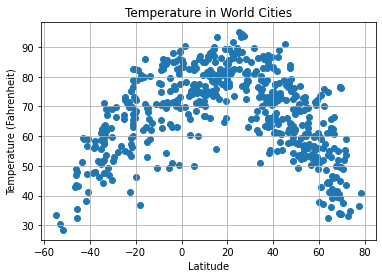

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat vs Temp.jpg")

This scatterplot is analysing the Data of Temperature in Fahrenheit vs Latitude. so as you can see as you get closer to the Equator, the temperature Max goes up as you approach the north and south poles the Max Temperature goes down

## Latitude vs. Humidity Plot

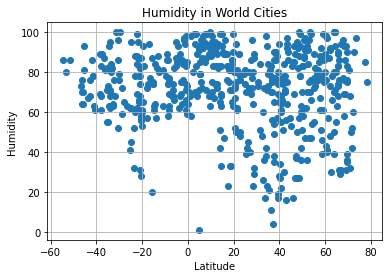

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat vs Hum.jpg")

The above scatterplot shows the Humidity vs Latitude across cities in the world. There doesn't seem to be a huge difference in Humidity change vs the latitude as the bulk of the data seems to sit above 60% spread fairly evenly across all latitude points

## Latitude vs. Cloudiness Plot

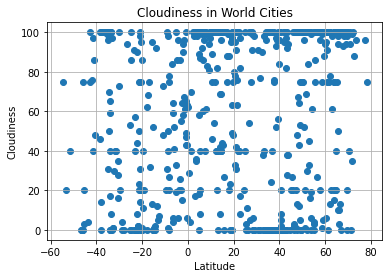

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat vs Cloud.jpg")

The above scatterplot shows the relationship between Cloudiness and Latitude. South of the Equator tends to have a higher Cloudiness rating compared to above the Equator, although many cities South still can have a low Cloudiness Rating.

## Latitude vs. Wind Speed Plot

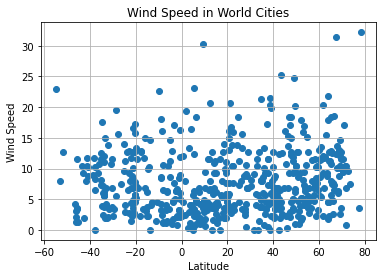

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat vs Wind.jpg")

The above Plot shows Wind speed averages vs Latitude. This plot seems to inticate that Wind speeds seem to be fairly consistent regardless of where in the worrld you are, but there are a couple outliers.

## Linear Regression

In [13]:
weather_south = weather_data[(weather_data['Lat'] <= 0)]  
weather_south

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Mahébourg,-20.4081,57.7000,68.29,56,20,5.75,MU,1655781480
4,Cape Town,-33.9258,18.4232,59.38,81,0,11.01,ZA,1655781401
5,Atuona,-9.8000,-139.0333,77.92,78,20,22.70,PF,1655781483
6,Flinders,-34.5833,150.8552,62.38,63,97,3.91,AU,1655781484
7,Opuwo,-18.0607,13.8400,36.68,57,0,2.19,NA,1655781484
...,...,...,...,...,...,...,...,...,...
523,Kununurra,-15.7667,128.7333,85.98,20,95,14.97,AU,1655781863
526,Viedma,-40.8135,-62.9967,41.34,61,48,10.33,AR,1655781868
536,Padang,-0.9492,100.3543,86.05,66,65,3.22,ID,1655781875
539,Palu,-0.8917,119.8707,88.61,61,43,2.10,ID,1655781877


In [14]:
weather_north = weather_data[(weather_data['Lat'] >= 0)]  
weather_north


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,39.40,93,100,10.02,RU,1655781480
2,Qaanaaq,77.4840,-69.3632,36.54,85,96,3.65,GL,1655781481
3,Zhuhai,22.2769,113.5678,87.85,89,40,10.36,CN,1655781482
8,Tiksi,71.6872,128.8694,43.63,52,35,6.85,RU,1655781485
9,Pushkinskiye Gory,57.0209,28.9103,52.52,81,100,4.92,RU,1655781486
...,...,...,...,...,...,...,...,...,...
543,Yabrūd,33.9674,36.6574,60.91,38,0,1.48,SY,1655781880
544,Paraíso,9.8383,-83.8656,66.88,100,100,1.63,CR,1655781881
545,Verāval,20.9000,70.3667,85.53,75,42,16.04,IN,1655781881
546,Novyy Urgal,51.0736,132.5642,57.83,97,100,4.79,RU,1655781882


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48065177722949615


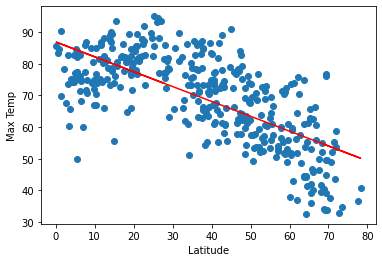

In [15]:
x_values = weather_north['Lat']
y_values = weather_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49774522754573747


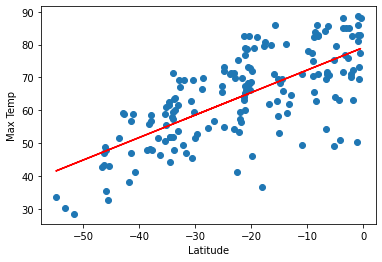

In [16]:
x_values = weather_south['Lat']
y_values = weather_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The 2 scatterplots show the relationship between Max Temp and Latitude for southern and Northern Hemispheres. As mentioned earlier there seems to be a correlation between moving away from the Equator and the lowring of the Max Temperature. The close to the Equator the Higher the Max Temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016837843722338666


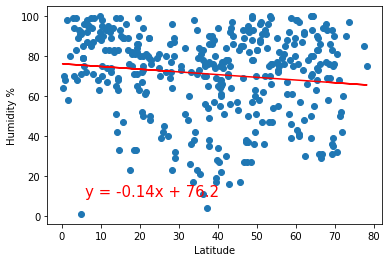

In [17]:
x_values = weather_north['Lat']
y_values = weather_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017868869605719572


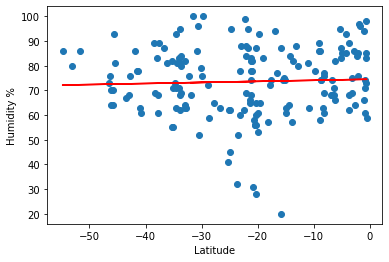

In [18]:
x_values = weather_south['Lat']
y_values = weather_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The above scatterplots show the relationship between Humidity and Latitude. The Correlation seems to be mainly consistent that the further north or south you go the Wind speeds average just below to above 70 MPH.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00039169621561906945


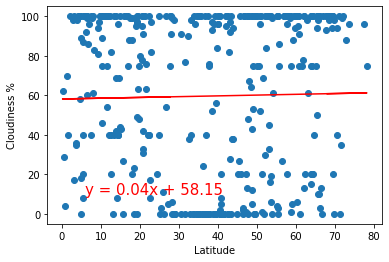

In [19]:
x_values = weather_north['Lat']
y_values = weather_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000243463825240263


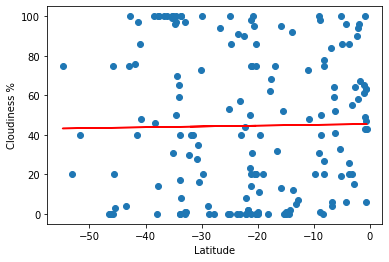

In [20]:
x_values = weather_south['Lat']
y_values = weather_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The above 2 Scatterplots show the relationship between Cloudiness and Latitude, with both the North and Southern Hemisheres showing thats its either very cloudy or not very cloudy at most latitude points with only little parts of the data sitting in the middle of the cloudiness %.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04415006003282873


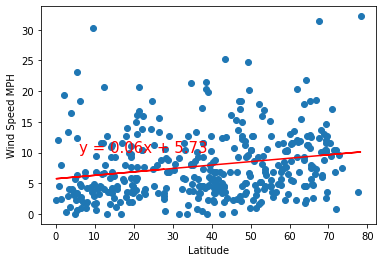

In [21]:
x_values = weather_north['Lat']
y_values = weather_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed MPH')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009674712962230785


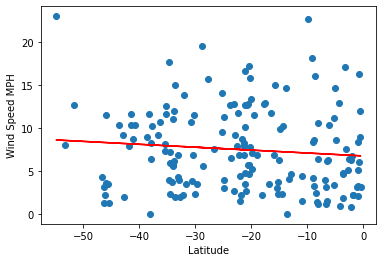

In [22]:
x_values = weather_south['Lat']
y_values = weather_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed MPH')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The above 2 scatterplots show the relationship between Wind speed (MPH) and Latitude for botrh Hemispheres. These plots indicate that in both Hemispheres it doesn't matter where you are you will get a reasonaly consitent Wind speed within 5 MPH higher or lower from 7MPH. there are some outl;iers mostly in the Northern hemisphere.